# DOPP 2021W Exercise 2

### Before you get started, please read the instructions in this notebook carefully.

## Preliminaries

- Please use only Python **version 3.6 or higher**. It is recommended to run the notebook on the JupyterHub. 


- This notebook will be scored using [nbgrader](https://nbgrader.readthedocs.io/en/stable/index.html). 
- Please use the code stubs provided, add and modify your code only at the provided markers, do not rename any functions. 
- Make sure that your assignment executes without any errors on the JupyterHub before submitting it. Submissions that do not execute will not be accepted.
- Do not change cell tags, as this may mess up the Validation and auto-grading features.


The submission deadline is **29.11.2021 23:55.**

Sections marked with `# YOUR CODE HERE` must be used to implement the functionality.
Cells containing `YOUR ANSWER HERE` must be used to fill in textual answers.

There is a total of 100 points that can be reached.

You might be awarded additional points for **good code quality**.

In [1]:
# Note: The only imports allowed are Python's standard library, pandas, numpy, scipy, matplotlib and scikit-learn
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# add imports as needed
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

## Goal

In this exercise, you will 
 * use `pandas` to read, prepare and transform data,
 * use `matplotlib` to visually analyse data,
 * use `scikit-learn` to build prediction models.


The goal of this exercise is to model the relationship between weather observations and the prevalence of new influenza infections.

To investigate a potential relationship, we will use two datasets:
 * hourly [weather observation data](https://dane.imgw.pl/#dane-archiwalne) in [Łódź](https://en.wikipedia.org/wiki/%C5%81%C3%B3d%C5%BA), Poland (2010-2020)
 * weekly reports on [new influenza infections](https://www.gov.pl/web/wsse-lodz/zachorowania-na-grype) in Łódź (2010-2021).

The data to be used can be found in the subdirectory named `data`. 

To complete this exercise, you will have to:
* prepare the data, which (at minimum) involves the following:
    - handling missing values,
    - handling outliers
    - temporal alignment (i.e. convert hourly weather data to weekly data using appropriate aggregation functions and then merging with influenza data),
* analyse the data:
    - compare descriptive statistics,
    - visually investigate the raw data to gain an understanding of the data, identify patterns, outliers etc.,
    - look at the relationship between the variables of interest,
* model the relationship:
    - fit a model that predicts new infections from weather observation data.
    
    
**Note:** In case you encounter problems with loading and processing the data (tasks 1-5), we will provide you also with a pickled version of preprocessed and merged datasets that you can use to complete the remaining parts of the exercise (tasks 6-8).

## Task 0: Data Examination

Maximum number of *extra* points for this task: **5**

- This is an open task, where you are free to show all the data examination and experimentations preceeding actual work on the assignment
- You can also include some preliminary plots and analysis of the data content which you used to solve remaining tasks
- You can create additional cells for this task


### Weather data examination.
#### Here I loaded all csv files into one dataframe. Checked missing values. Checked column types. 

In [2]:
    #Creating a dataframe for weather data
    weather_dataframes_list = []
    
    weather_files_names_list = [x for x in os.listdir('data/weather/') if x.endswith('.csv')]
    
    with open('data/weather/names.txt') as f:
        column_names = f.readlines()
    
    column_names =[x.rstrip() for x in column_names]
    
    for i in range(len(weather_files_names_list)):
        tmp_df = pd.read_csv("data/weather/" + weather_files_names_list[i],names=column_names)
        weather_dataframes_list.append(tmp_df)

    weather_data = pd.concat(weather_dataframes_list)
    
    
    weather_data.head()

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Station code,Station name,Year,Month,Day,Hour,Cloud base height CL CM encrypted [code],Measurement status HPOD,Lower cloud base height [m],Measurement status HPON,...,Freshly fallen snow cover height [cm],Measurement status HSS,Snow cover height in the plot [cm],Measurement status GRSN,Snow type [code],Shape of the cover [code],Sample height [cm],Measurement status HPRO,Sample weight [g],Measurement status CIPR
0,351190465,ŁÓDŹ,2011,1,1,0,3,NaN,270,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
1,351190465,ŁÓDŹ,2011,1,1,1,4,NaN,330,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
2,351190465,ŁÓDŹ,2011,1,1,2,4,NaN,300,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
3,351190465,ŁÓDŹ,2011,1,1,3,4,NaN,330,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0
4,351190465,ŁÓDŹ,2011,1,1,4,4,NaN,400,NaN,...,0,8.0,0,8.0,NaN,NaN,0,8.0,0,8.0


<AxesSubplot:>

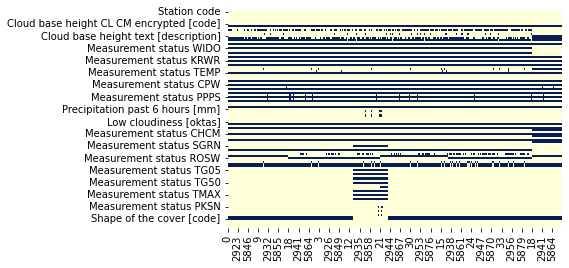

In [3]:
    sns.heatmap(weather_data.isna().transpose(),
            cmap="YlGnBu",
            cbar=False)

In [4]:
    #Column types
    weather_data.columns.to_series().groupby(weather_data.dtypes).count()

int64      26
float64    66
object     15
dtype: int64

### Influenza data examination.
#### Checked missing values. Checked column types.

In [5]:
    influenza_data = pd.read_csv("data/influenza/influenza.csv")

<AxesSubplot:>

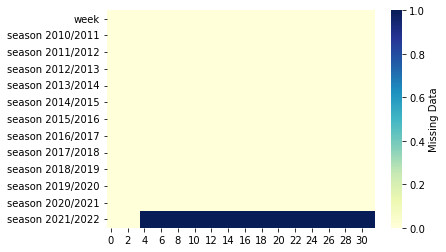

In [6]:
    sns.heatmap(influenza_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [7]:
    influenza_data.columns.to_series().groupby(influenza_data.dtypes).count()

int64      11
float64     1
object      1
dtype: int64

## Task 1: Load Data

Total number of points for completing this task: **20**

### Weather observations

As a first step, implement the method `load_weather_data()`, which should read all individual (yearly) datasets from the csv files in `data\weather\` into a single `pd.DataFrame` and return it. 

- make sure that you load all the data (2010-2020)
- make sure that all columns are appropriately named, use `data\weather\names.txt` file to fill in column names
- from the `Year`, `Month`, `Day` and `Hour` columns create column `Date` and `Week`, where `Date` is a [`pandas.Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) object and `Week` contains the week number of the date. Use Pandas built-in datetime handling features.
- create a `MultiIndex` from the date columns with the following hierarchy: `Year` - `Month` - `Week` - `Day` - `Hour` (make sure to label them accordingly)


**Hints:**
 
 - LOOK at the data in the original files
 - It is advisable not to append each data set individually, but to read each data frame, store it into a list and  combine them once at the end.
 - Your resulting data frame should look as follows:

![Weather data frame example](weather_data_dataframe_sample.png)

In [8]:
def load_weather_data():
    """ 
    Load all weather data files and combine them into a single Pandas DataFrame.
    Add a week column and a hierarchical index (year, month, week, day)
    
    Returns
    --------
    weather_data: data frame containing the weather data
    """
    
    # Creating an empty list to store separate dataframes of each .csv file
    weather_dataframes_list = []
    
    # Creating a list of csv file names for later usage when reading in the files themselves
    weather_files_names_list = [x for x in os.listdir('data/weather/') if x.endswith('.csv')]
    
    #Reading in column names
    with open('data/weather/names.txt') as f:
        column_names = f.readlines()
    
    #Stripping column names of trailing newlines('\n')
    column_names =[x.rstrip() for x in column_names]
    #column_names = sorted(column_names)
    
    #Creating dataframe list with defined columns
    for i in range(len(weather_files_names_list)):
        tmp_df = pd.read_csv("data/weather/" + weather_files_names_list[i],names=column_names)
        weather_dataframes_list.append(tmp_df)

    #Concatinating a list of dataframes
    weather_data = pd.concat(weather_dataframes_list)
    #Adding Date and Week columns
    weather_data["Date"] = pd.to_datetime(weather_data[["Year","Month","Day","Hour"]])
    weather_data["Week"] = weather_data['Date'].dt.isocalendar().week
       
    #Creating MultiIndex from Year - Month - Week - Day - Hour columns
    weather_data.set_index(["Year","Month","Week","Day","Hour"], inplace = True,append = True)
                
    return weather_data

data_weather = load_weather_data()

/tmp/ipykernel_846/1746918899.py:41: DtypeWarning: Columns (6,56) have mixed types.Specify dtype option on import or set low_memory=False.
  data_weather = load_weather_data()
/tmp/ipykernel_846/1746918899.py:41: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  data_weather = load_weather_data()


In [9]:
assert data_weather.shape[0] == 96432
assert data_weather.shape[1] > 102

# additional tests

In [10]:
# hidden tests

**Q** Which combination of year+week has the lowest number of entries? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

In [11]:
# fill your answer into these variables
year = 2010 
week = 53

data_weather.groupby(level=['Year','Week']).size().idxmin()

(2010, 53)

In [12]:
# hidden tests

### Influenza infections

Load and prepare the second dataset (`data/influenza/influenza.csv`), which contains the number of new influenza infections on a weekly basis, as follows:

- Stack all seasonal data into one column
- Convert months written in roman numerals to arabic numbers (II -> 2) and save them into `Month` column
- For each entry extract year based on the season and month values
- Extract week data into column `Week`
- Create a `MultiIndex` from the `Year` and `Week` columns
- Rename column containing influenza cases as `Influenza_cases`
- Make sure that all columns are appropriately typed
- Remove rows with missing infection counts
- Your resulting data frame should look as follows:

![Example data frame](influenza_data_dataframe_sample.png)

In [13]:
def roman_to_arabic(roman_number):
    roman_number = roman_number.split(".")
    
    number = 0
    if roman_number[1] == "I":
        number = 1
    elif roman_number[1] == "II":
        number = 2
    elif roman_number[1] == "III":
        number = 3
    elif roman_number[1] == "IV":
        number = 4
    elif roman_number[1] == "V":
        number = 5
    elif roman_number[1] == "VI":
        number = 6
    elif roman_number[1] == "VII":
        number = 7
    elif roman_number[1] == "VIII":
        number = 8
    elif roman_number[1] == "IX":
        number = 9
    elif roman_number[1] == "X":
        number = 10
    elif roman_number[1] == "XI":
        number = 11
    elif roman_number[1] == "XII":
        number = 12
    
    return number,roman_number[0]

def extract_year(season,month):
    searson_year = ""
    
    season = season.replace('/',' ').split()
    
    season_year = 0
    if month > 5:
        season_year = season[1]
        
    elif month < 5:
        season_year = season[2]
        
    
    return season_year
        
def load_influenza_data():
    """ 
    Load and prepare the influenza data file
    
    Returns
    --------
    influenza_data: data frame containing the influenza data
    """
    influenza_data = pd.read_csv("data/influenza/influenza.csv")
    
    
    #Gather keys of columns that need stacking
    keys = [c for c in influenza_data.columns if c.startswith('season')]
    
    #Stack season columns using melt
    influenza_data = pd.melt(influenza_data, id_vars='week', value_vars=keys, value_name='key')
    
    #Transform months roman to arabic and create month column
    influenza_data["month"] = influenza_data["week"].apply(lambda x: roman_to_arabic(x)[0])
    
    #For each entry extract year based on the season and month values
    influenza_data["year"] = influenza_data[["variable","month"]].apply(lambda x : extract_year(*x), axis=1)

    #Extract week data into column Week
    influenza_data["week"] = influenza_data["week"].apply(lambda x: roman_to_arabic(x)[1])
    
    #Drop not needed columns
    influenza_data = influenza_data.drop(["variable"], axis=1)
    
    #Create a MultiIndex from the Year and Week columns
    influenza_data.set_index(["year","week"], inplace = True,append = True)
    
    #Rename column containing influenza cases as Influenza_cases
    influenza_data = influenza_data.rename({"key":"influenza_cases"}, axis=1)
    
    #Remove rows with missing infection counts
    influenza_data = influenza_data[influenza_data['influenza_cases'].notna()]
    

    return influenza_data

data_influenza = load_influenza_data()

In [14]:
assert data_influenza.shape == (356, 2)
# additional tests


In [15]:
# hidden tests

**Q:** Which combination of year+week shows the highest number of infections? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

In [16]:
# fill your answer into these variables
year = 2017 
week = 4

data_influenza.groupby(level=["year","week"]).sum().idxmax()

influenza_cases     (2017, 4)
month              (2010, 49)
dtype: object

In [17]:
# hidden tests

**Q:** Which combination of year+month shows the highest number of infections? You should find the respective entry/entries using pandas. Return the first answer if there is more than one combination fulfilling these criteria.

In [18]:
# fill your answer into these variables
year = 2013  
month = 1

data_influenza.groupby(["year","month"]).sum().idxmax()

influenza_cases    (2013, 1)
dtype: object

In [19]:
# hidden tests

## Task 2: Handling Missing Values

Total number of points for completing this task: **15**

If you take a closer look at the data, you will notice that a few of the observations are missing.

There is a wide range of standard strategies to deal with such missing values, including:

- row deletion
- substitution methods (e.g., replace with mean or median)
- hot-/cold-deck methods (impute from a randomly selected similar record)
- regression methods

To decide which strategy is appropriate, it is essential to investigate the mechanism that led to the missing values to find out whether the missing data is missing completely at random, missing at random, or missing not at random. 

 - **MCAR** (Missing Completely At Random) means that there is no relationship between the missingness of the data and any of the values.
 - **MAR** (Missing At Random) means that there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.
 - **MNAR** (Missing Not At Random) means that there is a systematic relationship between the propensity of a value to be missing and its values. 
 

_______

You talked to the meteorologists who compiled the data to find out more about what mechanisms may have caused the missing values. 

They told you that they do not know why some of the temperature (`Air Temperature [°C]`) and pressure (`Surface pressure [hPa]` and `Mean sea-level pressure [hPa]`) readings are missing, but someone may have forgotten to record them. In any case, the propensity of temperature and pressure values to be missing does not have anything to do with the weather itself.

As far as the missing humidity readings are concerned (`Relative humidity [%]`), according to their experience, they suspect that the humidity sensor is less reliable when the wind blows directly from the West.

Check the plausibility of these hypotheses in the data, consider the implications, and devise an appropriate strategy to deal with the various missing values.

You also received an additional file from the meteorologists: `data\weather\description.txt` that contains description of the columns. According to that file, if data in a column called `Measurement status _X_` contains a specific code (either 8 or 9) then the preceding column value is not reliable. For example, when value for `Measurement status PORW` is equal to 8 or 9, then readings for `Wind gust  [m/s]` column should be treated as missing.


Because of the sensitivity of the sensor, wind gust data is unavailable for many records. Meteorologists tell you, that for this station, missing wind gust data could be easily approximated by multiplying standard wind speed (`Wind speed  [m/s]`) by a factor o 1.55.


- Handle missing values for the following columns: `Air Temperature [°C]`, `Surface pressure [hPa]`, `Mean sea-level pressure [hPa]`, `Relative humidity [%]` and `Wind gust  [m/s]`
- For the remaining columns, especially `Measurement status _X_`, it is ok to fill the missing values with 0

To implement your strategy, you can use a range of standard mechanisms provided by Pandas, by implementing `handle_missingValues_simple`, or implement a custom strategy (for extra points, by implementing `handle_missingValues_advanced`).

#### Here I confirm or deny hypotheses in the data, by checking if there are missing values based on the conditions provided in the description above. For Air Temperature [°C], Surface pressure [hPa] and Mean sea-level pressure [hPa] MCAR (Missing Completely At Random) applies. For Relative humidity [%]  MAR (Missing At Random)  applies. And for Wind gust  [m/s] the MNAR applies as there is a systematic relationship between the propensity of a value to be missing and its values. The checking and visualization is done below.

Air Temperature. MISSING VALUE COUNTS
2024
Surface pressure. MISSING VALUE COUNTS
5033
Mean sea-level pressure. MISSING VALUE COUNTS
5033
Relative humidity. WEST. MISSING VALUE COUNTS
801
Relative humidity. OVERALL. MISSING VALUE COUNTS
801
Wind gust. 8 or 9. MISSING VALUE COUNTS
85198
Wind gust. NaN. MISSING VALUE COUNTS
0
Wind speed. MISSING VALUE COUNTS
4607


<AxesSubplot:ylabel='None-Year-Month-Week-Day-Hour'>

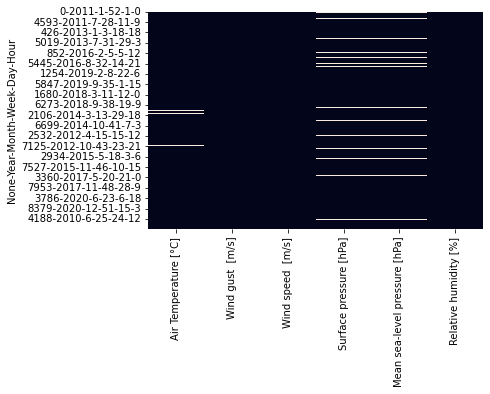

In [20]:
#Temperature and Pressures
print("Air Temperature. MISSING VALUE COUNTS")
print(sum(data_weather["Air Temperature [°C]"].isnull()))

print("Surface pressure. MISSING VALUE COUNTS")
print(sum(data_weather["Surface pressure [hPa]"].isnull()))

print("Mean sea-level pressure. MISSING VALUE COUNTS")
print(sum(data_weather["Mean sea-level pressure [hPa]"].isnull()))

#Relative humidity. Directly from the west
print("Relative humidity. WEST. MISSING VALUE COUNTS")
print(sum(data_weather[data_weather["Wind direction  [°]"]==270]["Relative humidity [%]"].isnull()))
#print(data_weather.groupby(["Wind direction  [°]"])["Relative humidity [%]"].count()==0)

#Relative humidity. OVERALL
print("Relative humidity. OVERALL. MISSING VALUE COUNTS")
print(sum(data_weather["Relative humidity [%]"].isnull()))

#If 8 or 9 in measurement columns then Wind gust should be treated as missing
print("Wind gust. 8 or 9. MISSING VALUE COUNTS")
print(sum(data_weather.loc[(data_weather["Measurement status PORW"] == 8 | 9) | (data_weather["Wind speed  [m/s]"] == 0), "Wind gust  [m/s]"] == 0))

print("Wind gust. NaN. MISSING VALUE COUNTS")
print(sum(data_weather["Wind gust  [m/s]"].isnull()))

print("Wind speed. MISSING VALUE COUNTS")
print(sum(data_weather["Wind speed  [m/s]"]==0))


tmp = data_weather[["Air Temperature [°C]","Wind gust  [m/s]","Wind speed  [m/s]","Surface pressure [hPa]","Mean sea-level pressure [hPa]","Relative humidity [%]"]]
        
sns.heatmap(tmp.isnull(), cbar=False)

In [21]:
def handle_missingValues_simple(incomplete_data):
    """ 
    Parameters
    --------
    incomplete_data: data frame containing missing values 
    
    Returns
    --------
    complete_data: data frame not containing any missing values
    """
   
    complete_data = incomplete_data
    
    #For the Air Temperature replace missing values with average temperature of the month
    complete_data["Air Temperature [°C]"].fillna((complete_data.groupby(["Month"])["Air Temperature [°C]"].transform("mean")), inplace=True)

    #For Relative Humidity
    complete_data["Relative humidity [%]"].fillna((complete_data.groupby(["Hour"])["Relative humidity [%]"].transform("mean")), inplace=True) 
   
    #For the pressures fill the missing values with the previous existing value
    complete_data["Surface pressure [hPa]"] = complete_data["Surface pressure [hPa]"].fillna(method='ffill')
    
    complete_data["Mean sea-level pressure [hPa]"] = complete_data["Mean sea-level pressure [hPa]"].fillna(method='ffill')
    
    #For the wind gust 
    mask = (complete_data["Measurement status PORW"]== 8 | 9) | (complete_data["Wind speed  [m/s]"]== 0)
    complete_data["Wind gust  [m/s]"] = np.where(mask, complete_data["Wind speed  [m/s]"] * 1.55, complete_data["Wind gust  [m/s]"])

    #Change remaining NaN's to 0
    complete_data = complete_data.fillna(value=0)
    
    return complete_data


def handle_missingValues_advanced(incomplete_data):
    """ 
    Parameters
    --------
    data: data frame containing missing values 
    
    Returns
    --------
    data: data frame not containing any missing values
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return complete_data
    
data_weather_complete = handle_missingValues_simple(data_weather)

In [22]:
# hidden tests

In [23]:
# hidden tests

In [24]:
# hidden tests

###  Discussion

#### Pros and Cons of strategies for dealing with missing data

In the cell provided below, discuss the PROs and CONs of various strategies (row deletion, imputation, hot deck methods etc.) for dealing with missing data. Discuss when it is appropriate to use each method.

Row deletion has a major con which is loosing information from other important features and is appropriate when the variable is insignificant and there are a lot of observations missing. The pro of row deletion would be that it's simple.

Imputation has a downside that the imputed value might be out of context and a pro would be that it is easy to understand.

Hot deck methods have similar pros and cons as imputation.



#### Your chosen strategy <span style="color:blue">

Explain your chosen strategy for dealing with missing values for the various attributes in the cell below.


Chosen strategy for the Air Temperature variable was replacing the missing values with average of the month.

For Relative humidity same was done as for temperature only using the relative humidity of the hour.

Surface pressure and Mean sea-level pressure variables were dealt with by replacing there missing values with previous available value.

Wind gust missing values and unreliable values were dealt with by using approximation Wind Speed * 1.55.

## Task 3: Handling Outliers
Total number of points for completing this task: **10**

If you take a closer look at some of the observations, you should notice that some of the temperature values are not particularly plausible (hint: plotting histograms of the distributions helps). Hypothesize on the nature of these outliers and implement a strategy to handle them.

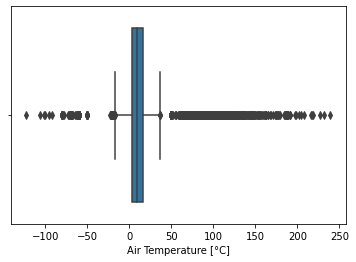

In [25]:
boxplot = sns.boxplot(x=data_weather_complete["Air Temperature [°C]"])

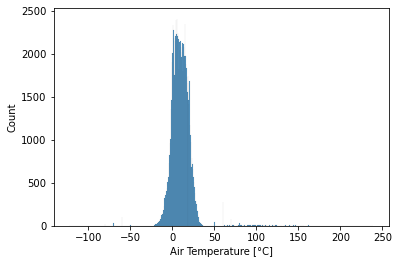

In [26]:
histogram = sns.histplot(data_weather_complete,x="Air Temperature [°C]")

[-123.20000000000002 -106.4 -102.2 -100.1 -96.0 -92.4 -80.0 -79.8 -77.7
 -73.19999999999999 -71.4 -71.39999999999999 -70.0 -68.4
 -67.19999999999999 -64.19999999999999 -63.0 -62.400000000000006 -61.8
 -60.6 -60.0 -50.0 -22.7 -22.4 -22.2 -22.1 -21.9 -21.7 -21.6 -21.4 -21.3
 -21.2 -21.1 -21.0 -20.9 -20.8 -20.7 -20.6 -20.5 -20.4 -20.3 -20.2 -20.1
 -20.0 -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1 -18.9 -18.8
 -18.7 -18.6 -18.5 -18.4 -18.3 -18.2 -18.1 -18.0 -17.9 -17.8 -17.7 36.5
 36.9 50.0 51.5 54.0 55.0 56.0 58.0 59.5 60.0 60.6 61.2 61.8
 62.400000000000006 63.0 63.6 64.19999999999999 64.80000000000001 65.4
 66.0 66.5 66.6 67.5 67.80000000000001 68.4 69.6 70.0 70.19999999999999
 70.7 70.80000000000001 71.4 72.0 72.10000000000001 72.6 72.8
 73.19999999999999 73.5 73.80000000000001 74.0 74.4 75.0 75.6
 76.19999999999999 76.5 76.80000000000001 77.0 77.4 78.0 78.6
 79.10000000000001 79.19999999999999 79.80000000000001 80.0 80.5 81.0 81.2
 81.6 82.0 82.19999999999999 82.600000000000

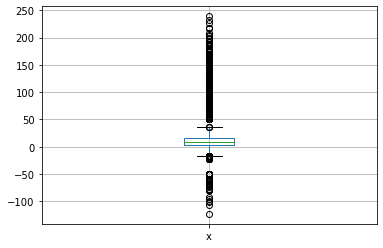

In [27]:
_, bp = pd.DataFrame.boxplot(data_weather_complete["Air Temperature [°C]"], return_type='both')

outliers = [flier.get_ydata() for flier in bp["fliers"]]

print(np.unique(outliers[0]))

In [28]:
def handle_outliers(noisy_data):
    """
    Parameters
    --------
    noisy_data: data frame that contains outliers
    
    Returns
    --------
    cleaned_data: data frame with outliers
    """
    
    _, bp = pd.DataFrame.boxplot(noisy_data["Air Temperature [°C]"], return_type='both')
    plt.close()
    outliers = [flier.get_ydata() for flier in bp["fliers"]]
    
    unique_temp_outliers = np.unique(outliers[0])
    
    cleaned_data = noisy_data
    
    #Removing all rows which cointain any of the outlier values.
    cleaned_data = cleaned_data[~cleaned_data["Air Temperature [°C]"].isin(unique_temp_outliers)]
    
    return cleaned_data
    
data_weather_cleaned = handle_outliers(data_weather_complete)

In [29]:
# hidden tests

In [30]:
# hidden tests

In [31]:
# hidden tests

#### Your chosen strategy

In the cell below, explain your chosen strategy for dealing with outliers.


The outliers were detected by taking a look at the underlying distributions visually, by using histogram and a boxplot. Initially the idea was to check overall average temperature in winter and summer in the city of Lodz and based on that to first change mild(weak) outliers to the average of the temperature, however after seeing in the https://weatherspark.com/y/85184/Average-Weather-in-%C5%81%C3%B3d%C5%BA-Poland-Year-Round website, that the lowest temperature in winter is -5 and in summer highest temperature is around 24 degrees I've decided on removing all rows which contain the temperature outliers, because the difference between the lowest average temperature from the website and the smallest negative value in the array of outliers(created in the previous cell) is way to big to be considered as mild outlier. Same goes for the highest average temperature from the website with comparison to the values in the unique temperature outliers array.

## Task 4: Aggregate values
Total number of points for completing this task: **5**

Aggregate the observations on a weekly basis. Return a data frame with a hierarchical index (levels `year` and `week`) on the vertical axis and the following weekly aggregations as columns:

- `temp_weeklyMin`: minimum of `Air Temperature [°C]`
- `temp_weeklyMax`: <span style="color:red">max</span> of `Air Temperature [°C]`
- `temp_weeklyMean`: mean of `Air Temperature [°C]`
- `temp_weeklyMedian`: median of `Air Temperature [°C]`


- `precip_weeklyMin`: min of `Precipitation past 6 hours [mm]`
- `precip_weeklyMax`: max of `Precipitation past 6 hours [mm]`
- `precip_weeklyMean`: mean of `Precipitation past 6 hours [mm]`


- `hum_weeklyMin`: min of `Relative humidity [%]`
- `hum_weeklyMax`: max of `Relative humidity [%]`
- `hum_weeklyMean`: mean of `Relative humidity [%]`


- `wind_weeklyMean`: mean of `Wind speed  [m/s]`
- `wind_weeklyMax`: max of `Wind speed  [m/s]`
- `gust_weeklyMax`: max of `Wind gust  [m/s]`


**Note:** You can create more aggregation columns (for extra points), as depending on selected algorithm, other features might be more informative for prediction.

**Note2:** Attentive data scientists might have noticed a problem with isocalendars when aggregating on `Year` and `Week`. You can ignore this for the purpose of this lecture. In real-world settings you might consider addressing this issue, depending on your task and data

In [32]:
def aggregate_weekly(data):
    """ 
    Parameters
    --------
    data: weather data frame
    
    Returns
    --------
    weekly_stats: data frame that contains statistics aggregated on a weekly basis
    """
    weekly_weather_data = pd.DataFrame()
    
    weekly_weather_data = data.groupby(level=["Year","Week"]).agg(
    temp_weeklyMin=pd.NamedAgg(column="Air Temperature [°C]", aggfunc='min'),
    temp_weeklyMax=pd.NamedAgg(column="Air Temperature [°C]", aggfunc='max'),
    temp_weeklyMean=pd.NamedAgg(column="Air Temperature [°C]", aggfunc=np.mean),
    temp_weeklyMedian=pd.NamedAgg(column="Air Temperature [°C]", aggfunc=np.median),
        
    precip_weeklyMin=pd.NamedAgg(column="Precipitation past 6 hours [mm]", aggfunc='min'),
    precip_weeklyMax=pd.NamedAgg(column="Precipitation past 6 hours [mm]", aggfunc='max'),
    precip_weeklyMean=pd.NamedAgg(column="Precipitation past 6 hours [mm]", aggfunc=np.mean),
        
    hum_weeklyMin=pd.NamedAgg(column="Relative humidity [%]", aggfunc='min'),
    hum_weeklyMax=pd.NamedAgg(column="Relative humidity [%]", aggfunc='max'),
    hum_weeklyMean=pd.NamedAgg(column="Relative humidity [%]", aggfunc=np.mean),
        
    wind_weeklyMean=pd.NamedAgg(column="Wind speed  [m/s]", aggfunc=np.mean),
    wind_weeklyMax=pd.NamedAgg(column="Wind speed  [m/s]", aggfunc='max'),
        
    gust_weeklyMax=pd.NamedAgg(column="Wind gust  [m/s]", aggfunc='max'),
    )
    
    weekly_weather_data = weekly_weather_data.reset_index()
    weekly_weather_data.set_index(["Year","Week"], inplace = True)
    
    return weekly_weather_data

data_weather_weekly = aggregate_weekly(data_weather_cleaned)

In [33]:
# hidden tests

## Task 5: Merge influenza and weather datasets
Total number of points for completing this task: **5**

Merge the `data_weather_weekly` and `data_influenza` datasets. Beware that both datasets contain rows that do not appear in the other dataset.

In [34]:
def merge_data(weather_df, influenza_df):
    """ 
    Parameters
    --------
    weather_df: weekly weather data frame
    influenza_df: influenza data frame
    
    Returns
    --------
    merged_data: merged data frame that contains both weekly weather observations and prevalence of influence infections
    """

    df1 = weather_df.reset_index()
    df2 = influenza_df.reset_index()
    df1['Week']=df1['Week'].astype(int)
    df2['week']=df2['week'].astype(int)
    df1['Year']=df1['Year'].astype(int)
    df2['year']=df2['year'].astype(int)
    merged_data = pd.merge(df1, df2, left_on=["Year","Week"], right_on=["year","week"])
    merged_data.set_index(["Year","Week"], inplace = True)
    merged_data = merged_data.drop(["year","week","level_0"], axis=1)
    merged_data[["gust_weeklyMax"]] = merged_data[["gust_weeklyMax"]].astype(int)
    
    
    return merged_data

data_merged = merge_data(data_weather_weekly, data_influenza)

In [35]:
data_merged.head()

temp_weeklyMin  temp_weeklyMax  temp_weeklyMean  temp_weeklyMedian  \
Year Week                                                                       
2010 37               4.1            16.9        11.911951              12.50   
     38               3.4            22.9        13.857298              13.90   
     39               3.9            16.1         8.335990               7.90   
     40              -2.7            14.9         6.620788               6.30   
     41              -3.4            10.3         4.203844               4.05   

           precip_weeklyMin  precip_weeklyMax  precip_weeklyMean  \
Year Week                                                          
2010 37                 0.0               3.3           0.083537   
     38                 0.0               0.0           0.000000   
     39                 0.0               8.7           0.195181   
     40                 0.0               0.0           0.000000   
     41                 0.0               1.3           0.010241   

           hum_weeklyMin  hum_weeklyMax  hum_weeklyMean  wind_weeklyMean  \
Year Week                                                                  
2010 37             57.0           99.0       84.006664         3.701220   
     38             40.0          100.0       75.593635         3.421687   
     39             53.0           98.0       90.085903         3.855422   
     40             43.0          100.0       75.385542         5.168675   
     41             35.0          100.0       82.599356         2.475904   

           wind_weeklyMax  gust_weeklyMax  influenza_cases  month  
Year Week                                                          
2010 37                11              19             16.0      9  
     38                 7              10            125.0      9  
     39                 8               9            192.0      9  
     40                10              15            335.0      9  
     41                 6               0            342.0     10

In [36]:
# hidden tests

## Processed and merged data: shortcut for Tasks 6-8

If you encounter problems with the first five tasks, you can uncomment and use the following code to load pickled `DataFrame` containing already merged and preprocessed weather and influenza datasets. You can use this data to complete tasks 6-8. 

In [37]:
# import pickle

# with open("data/data_merged.pickle","rb") as fp:
#     data_merged = pickle.load(fp)

## Task 6: Visualization
Total number of points for completing this task: **15**

To better understand the dataset, create visualisations of the merged data using `matplotlib` that help explore potential relationships between the variables before developing a model.


**Note:** Hand in multiple figures. Use a proper naming configuration for the image files. Your plots should present information clearly (i.e. include titles, axis labels, legends,.. -> http://imgs.xkcd.com/comics/convincing.png). You should also describe which insights you gained from the figures.

**Note 2:** Choice of a proper chart type is essential. Points might be subtracted when using inappropriate plots and descriptions, so please *do not* just use all possible plotting functions from `matplotlib` without understanding and justification.

**Note 3:** You can also use `pandas` and `seaborn` python packages to create the plots.

#### First I took a look at the correlation heatmap where it is possible to see which variables correlate the most. From this plot I see that temperatures and month have highest negative correlation with influenza cases. This could lead to our variables of interest.

Text(0.5, 1.0, 'Correlation heatmap')

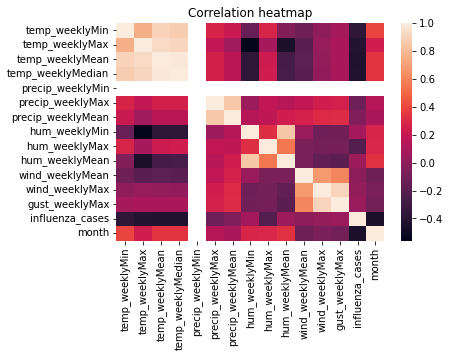

In [38]:
sns.heatmap(data_merged.corr());
plt.title("Correlation heatmap")

#### Then I took a look at the relations between the influenza cases and temperatures. From the plots we see that no strong linear relationship exists. The situation does not get better after applying log transformation on the influenza cases. Temperatures are combined into plots by two because of conveniance and producing less plots.

Text(0.5, 1.0, 'Influenza cases relation with temp_weeklyMin and temp_weeklyMax')

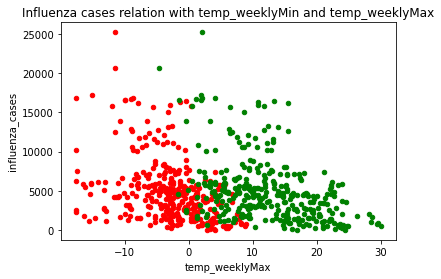

In [39]:
plt1 = data_merged.reset_index().plot.scatter(x="temp_weeklyMin",y="influenza_cases",color='r')
plt2 = data_merged.reset_index().plot.scatter(x="temp_weeklyMax",y="influenza_cases",color='g',ax=plt1)
plt.title("Influenza cases relation with temp_weeklyMin and temp_weeklyMax")

Text(0.5, 1.0, 'Influenza cases relation with temp_weeklyMean and temp_weeklyMedian')

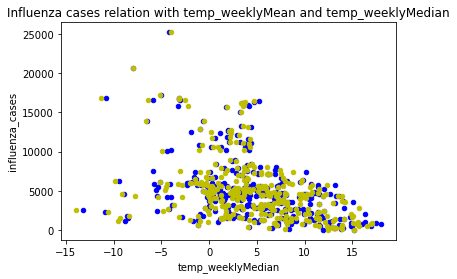

In [40]:
plt3 = data_merged.reset_index().plot.scatter(x="temp_weeklyMean",y="influenza_cases",color='b')
plt4 = data_merged.reset_index().plot.scatter(x="temp_weeklyMedian",y="influenza_cases",color='y',ax=plt3)
plt.title("Influenza cases relation with temp_weeklyMean and temp_weeklyMedian")

Text(0.5, 1.0, 'Influenza cases log transformed relation with temp_weeklyMean')

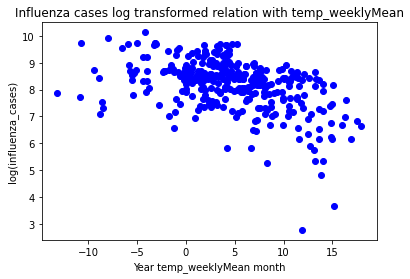

In [41]:
plt5 = plt.scatter(data_merged["temp_weeklyMean"], np.log(data_merged["influenza_cases"]),color='b')
plt.xlabel("Year temp_weeklyMean month")
plt.ylabel("log(influenza_cases)")
plt.title("Influenza cases log transformed relation with temp_weeklyMean")

Text(0.5, 1.0, 'Influenza cases of the first 4 months of each year')

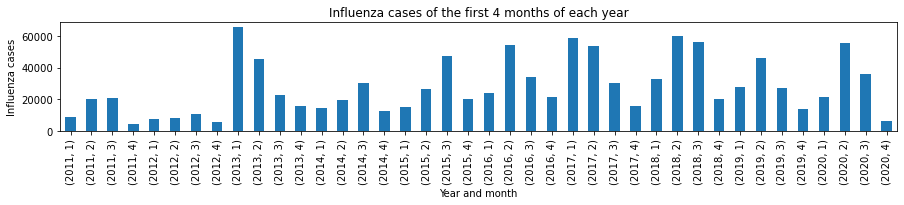

In [42]:
fig = plt.figure(figsize=(15, 2))
data_merged_tmp = data_merged[data_merged["month"].isin([1,2,3,4])]
pltz = data_merged_tmp.reset_index().groupby(["Year","month"])["influenza_cases"].sum().plot.bar()
pltz.set_xlabel("Year and month")
pltz.set_ylabel("Influenza cases")
plt.title("Influenza cases of the first 4 months of each year")

In [43]:
# hidden tests

#### Findings 
Summarize your findings.

As there is no strong linear relationship between the variables of interest the algorithm of my choice would be Logistic Regression. The last plot is of interest for later comparison when the prediction for the first 4 months of 2021 will be done.

## Task 7: Influenza prediction model 
Total number of points for completing this task: **20**


Build and train a model using weather and influenza data from 2010 until 2020 using `scikit-learn`.

Please structure and document your code so that it is easy to follow.

 - Choose appropriate machine learning algorithm(s) for the problem at hand
 - Experiment with different features and feature selection methods
 - Make sure your results are reproducible
 - Don't hesitate to go back to previous steps if you notice any data quality issues
 - If your chosen algorithm has specific parameters, explore their effect with different settings using 10-fold cross-validation
 - Experiment with different training/test splits
 - If appropriate, try different scaling approaches (min/max, z-score,..).
 - Present your results (e.g. by plotting predicted against true values)
 
 
 - How good does your model fit when you evaluate it with the validation data set?

First we choose the model which is Logistic Regression.

Then we define a function for the feature selection from scikit which is SelectKBest.

In [44]:
def select_K_best_features(X_train,y_train):
    k_selector = SelectKBest(f_regression, k="all")
    k_selector = k_selector.fit(X_train, y_train)
    return k_selector

Then feature selection is applied on splitted data and from retrieved scores I chose top 3 variables as it provided the best R^2 score.

In [45]:
targets = data_merged.loc[:,"influenza_cases"]
features = data_merged.loc[:, data_merged.columns != "influenza_cases"]

X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.3,  random_state=42)

k_selector = select_K_best_features(X_train,y_train)

k_selector.scores_

/opt/conda/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


array([41.60102333, 55.15261001, 61.10441413, 59.49629868,         nan,
        4.14005925,  1.41572154,  2.76577896, 13.451771  ,  0.67968712,
        0.23969481,  0.14118716,  0.38593953, 63.42870368])

In [46]:
k_selector = SelectKBest(f_regression, k=3)
k_selector = k_selector.fit(X_train, y_train)
X_train_new = k_selector.fit_transform(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/opt/conda/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [47]:
model = LogisticRegression(random_state=42).fit(X_train_new, y_train)
y_pred = model.predict(X_test[X_test.columns[k_selector.get_support()]])

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


MSE 14484149.366336634
R^2 0.23303810810763625


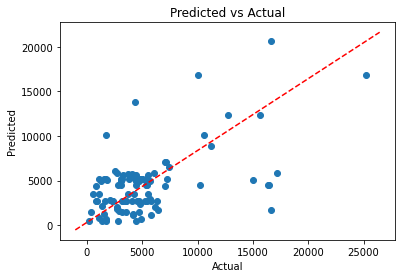

In [48]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.plot(plt.xlim(), plt.ylim(), ls="--", c="red")

print("MSE",mean_squared_error(y_test.to_numpy(), y_pred))
print("R^2",r2_score(y_test.to_numpy(), y_pred))

#### Approach and algorithm
Motivate your approach and choice of algorithm in the cell below

Based on the previous visualizations I chose the Logistic Regression algorithm as there were no strong linear relationships between the most correlated variables and Logistic Regression also provided the best result comparing to Lasso and Decision Tree. I fitted it on the 3 most important variables based on scores which were retrevied from f_regressor used with SelectKBest from scikit library as they provided the best results. Achieved MSE and R^2 values are not good. 

## Task 8: Test model on last weeks of 2020/2021 season
Total number of points for completing this task: **10**

Load weather data for corresponding `Station code` for <span style="color:red">January-April 2021</span> from `data/prediction/` and test the quality of your model with `data_influenza`.


**Note:** This data is encoded with 'Central European (Windows 1250)' encoding.

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,34,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


MSE 13365731.9375
R^2 -18.612154947325685


/opt/conda/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/opt/conda/lib/python3.9/site-packages/sklearn/base.py:434: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


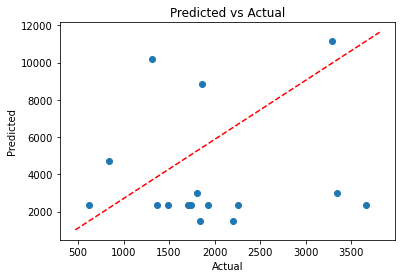

In [49]:
# Creating an empty list to store separate dataframes of each .csv file
test_dataframes_list = []
    
# Creating a list of csv file names for later usage when reading in the files themselves
test_files_names_list = [x for x in os.listdir('data/prediction/') if x.endswith('.zip')]
    
#Reading in column names
with open('data/weather/names.txt') as f:
    column_names = f.readlines()
    
#Stripping column names of trailing newlines('\n')
column_names =[x.rstrip() for x in column_names]

#Creating dataframe list with defined columns
for i in range(len(test_files_names_list)):
    tmp_df = pd.read_csv("data/prediction/" + test_files_names_list[i],names=column_names,encoding='cp1250')
    mask = ((tmp_df["Station code"]== 351190465) & (tmp_df["Month"].isin([1,2,3,4])))
    test_dataframes_list.append(tmp_df[mask])

#Concatinating a list of dataframes
test_data = pd.concat(test_dataframes_list)

#Adding Date and Week columns
test_data["Date"] = pd.to_datetime(test_data[["Year","Month","Day","Hour"]])
test_data["Week"] = test_data['Date'].dt.isocalendar().week
       
#Creating MultiIndex from Year - Month - Week - Day - Hour columns ???labels
test_data.set_index(["Year","Month","Week","Day","Hour"], inplace = True,append = True)
                
test_data = handle_missingValues_simple(test_data)

test_data = handle_outliers(test_data)

test_data = aggregate_weekly(test_data)

test_data = merge_data(test_data,data_influenza)

features_test = test_data.loc[:,test_data.columns != "influenza_cases"]
targets_test = test_data.loc[:,"influenza_cases"]

selector = SelectKBest(f_regression, k=3)
selector = selector.fit(features_test, targets_test)
#test_data.head()
features_test[features_test.columns[selector.get_support()]]
y_test_pred = model.predict(features_test[["month","temp_weeklyMean","temp_weeklyMedian"]])


plt.scatter(targets_test, y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.plot(plt.xlim(), plt.ylim(), ls="--", c="red")

#features_test[features_test.columns[selector.get_supporty_test_pred
print("MSE",mean_squared_error(targets_test.to_numpy(), y_test_pred))
print("R^2",r2_score(targets_test.to_numpy(), y_test_pred))

#### Findings 
Summarize your findings and lessons learned.

As it is visable from the results plot, MSE and R^2 values, the model performed very poorly.